In [26]:
import cv2
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from PIL import Image
from sklearn.svm import SVC
from sklearn import metrics

In [73]:
src = cv2.imread('Train/original_retinal_images/IDRiD_34.jpg', cv2.IMREAD_UNCHANGED)
label = Image.open('Train/masks_Haemorrhages/IDRiD_34_HE.tif')
label = np.asarray(label)

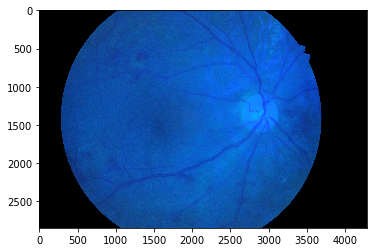

In [74]:
plt.imshow(src, cmap='gray')

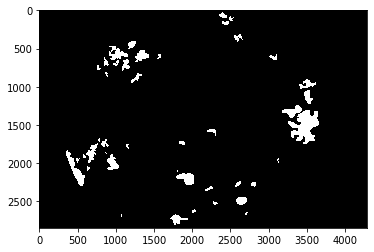

In [75]:
plt.imshow(label, cmap='gray')

(178, 268, 3)


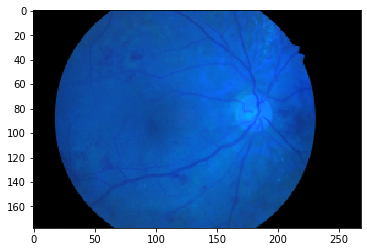

In [76]:
w_ratio = 0.5
h_ratio = 0.5
img = cv2.resize(src, (0,0), src, w_ratio, h_ratio)
img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
plt.imshow(img, cmap='gray')
print(img.shape)

In [77]:
(x, y, _) = img.shape
feature = []
labels = []
for i in range(0, x):
    for j in range(0, y):
        if i in [0,1] or i in [(x - 1), (x - 2)] or j in [0, 1] or j in [(y - 1), (y - 2)]:
            pass
        else:
            window = img[(i-2):(i+3),(j-2):(j+3)]
            #print(window.shape)
            r = []
            g = []
            b = []
            for row in range(window.shape[0]):
                for column in range(window.shape[1]):
                    pixel = window[row][column]
                    r.append(pixel[0])
                    g.append(pixel[1])
                    b.append(pixel[2])
            
            l = []
            meanR = np.mean(r)
            meanG = np.mean(g)
            meanB = np.mean(b)
            l.append(meanR)
            l.append(meanG)
            l.append(meanB)
            
            feature.append(l)
            labels.append(label[i][j])
            

In [78]:
files = ['35']
for file in files:
    src = cv2.imread('Train/original_retinal_images/IDRiD_' + file + '.jpg', cv2.IMREAD_UNCHANGED)
    label = Image.open('Train/masks_Haemorrhages/IDRiD_' + file + '_HE.tif')
    label = np.asarray(label)
    w_ratio = 0.5
    h_ratio = 0.5
    img = cv2.resize(src, (0,0), src, w_ratio, h_ratio)
    img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
    img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
    img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    (x, y, _) = img.shape
    for i in range(0, x):
        for j in range(0, y):
            if i in [0,1] or i in [(x - 1), (x - 2)] or j in [0, 1] or j in [(y - 1), (y - 2)]:
                pass
            else:
                window = img[(i-2):(i+3),(j-2):(j+3)]
                #print(window.shape)
                r = []
                g = []
                b = []
                for row in range(window.shape[0]):
                    for column in range(window.shape[1]):
                        pixel = window[row][column]
                        r.append(pixel[0])
                        g.append(pixel[1])
                        b.append(pixel[2])

                l = []
                meanR = np.mean(r)
                meanG = np.mean(g)
                meanB = np.mean(b)
                l.append(meanR)
                l.append(meanG)
                l.append(meanB)

                feature.append(l)
                labels.append(label[i][j])

In [79]:
clf = SVC(gamma='auto')
clf.fit(feature,labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
src = cv2.imread('Train/original_retinal_images/IDRiD_34.jpg', cv2.IMREAD_UNCHANGED)
label = Image.open('Train/masks_Haemorrhages/IDRiD_34_HE.tif')
label = np.asarray(label)
w_ratio = 0.5
h_ratio = 0.5
img = cv2.resize(src, (0,0), src, w_ratio, h_ratio)
img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
(x, y, _) = img.shape
feature = []
labels = []
for i in range(0, x):
    for j in range(0, y):
        if i in [0,1] or i in [(x - 1), (x - 2)] or j in [0, 1] or j in [(y - 1), (y - 2)]:
            feature.append(img[i][j])
            labels.append(label[i][j])
        else:
            window = img[(i-2):(i+3),(j-2):(j+3)]
            #print(window.shape)
            r = []
            g = []
            b = []
            for row in range(window.shape[0]):
                for column in range(window.shape[1]):
                    pixel = window[row][column]
                    r.append(pixel[0])
                    g.append(pixel[1])
                    b.append(pixel[2])
            
            l = []
            meanR = np.mean(r)
            meanG = np.mean(g)
            meanB = np.mean(b)
            l.append(meanR)
            l.append(meanG)
            l.append(meanB)
            
            feature.append(l)
            labels.append(label[i][j])
print(len(feature))
print(len(labels))

47704
47704


In [90]:
prediction = clf.predict(feature)
print(prediction.shape)

(47704,)


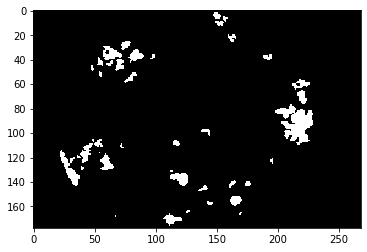

In [91]:
plt.imshow(label, cmap='gray')

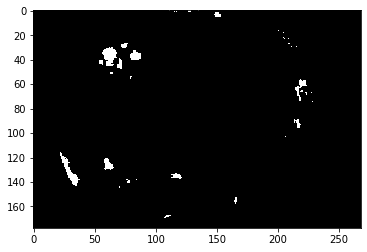

In [92]:
picture = np.reshape(prediction, (178, 268))
plt.imshow(picture, cmap='gray')
#save the image!!

In [64]:
a = np.array([1,2,3,4,5,6])
print(a.shape)
b = np.reshape(a, (2, 3))
print(b)

(6,)
[[1 2 3]
 [4 5 6]]


In [27]:
print(len(prediction))
print(len(labels))
totalPixels = 0
correctPixels = 0
correctPrecision = 0
totalPrecision = 0
correctRecall = 0
totalRecall = 0
for index in range(len(prediction)):
    totalPixels += 1
    if prediction[index] == labels[index]:
        correctPixels += 1
    
    if prediction[index] == 1:
        totalPrecision += 1
        if labels[index] == 1:
            correctPrecision += 1
    
    if labels[index] == 1:
        totalRecall += 1
        if prediction[index] == 1:
            correctRecall += 1
    
acc = correctPixels / totalPixels
precision = correctPrecision/ totalPrecision
recall = correctRecall / totalRecall
f1 = 2 * precision * recall /(precision + recall)
fpr, tpr, thresholds = metrics.roc_curve(labels, prediction, pos_label=1)
auc = metrics.auc(fpr, tpr)

prec, rec, _ = metrics.precision_recall_curve(labels, prediction, pos_label=1)
aucpr = metrics.auc(rec, prec)
print("accurracy is ", acc)
print("precision is ", precision)
print("recall is ", recall)
print("F1 is ", f1)
print("auc is", auc)
print("aucpr is", aucpr)

47704
47704
accurracy is  0.9696880764715747
precision is  0.6818181818181818
recall is  0.05047106325706595
F1 is  0.09398496240601503
auc is 0.5248568912719619
aucpr is 0.38093373875429326


In [29]:
totalPixels = 0
correctPixels = 0
correctPrecision = 0
totalPrecision = 0
correctRecall = 0
totalRecall = 0
files = ['55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67']
auc=0
aucpr=0
f1=0
for file in files:
    src = cv2.imread('Test/original_retinal_images/IDRiD_'+file + '.jpg', cv2.IMREAD_UNCHANGED)
    label = Image.open('Test/masks_Haemorrhages/IDRiD_'+file+'_HE.tif')
    label = np.asarray(label)
    w_ratio = 0.5
    h_ratio = 0.5
    img = cv2.resize(src, (0,0), src, w_ratio, h_ratio)
    img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
    img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
    img = cv2.resize(img, (0,0), img, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    label = cv2.resize(label, (0,0), label, w_ratio, h_ratio)
    (x, y, _) = img.shape
    feature = []
    labels = []
    for i in range(0, x):
        for j in range(0, y):
            if i in [0,1] or i in [(x - 1), (x - 2)] or j in [0, 1] or j in [(y - 1), (y - 2)]:
                feature.append(img[i][j])
                labels.append(label[i][j])
            else:
                window = img[(i-2):(i+3),(j-2):(j+3)]
            #print(window.shape)
                r = []
                g = []
                b = []
                for row in range(window.shape[0]):
                    for column in range(window.shape[1]):
                        pixel = window[row][column]
                        r.append(pixel[0])
                        g.append(pixel[1])
                        b.append(pixel[2])
            
                l = []
                meanR = np.mean(r)
                meanG = np.mean(g)
                meanB = np.mean(b)
                l.append(meanR)
                l.append(meanG)
                l.append(meanB)
            
                feature.append(l)
                labels.append(label[i][j])
    prediction = clf.predict(feature)
    for index in range(len(prediction)):
        totalPixels += 1
        if prediction[index] == labels[index]:
            correctPixels += 1
    
        if prediction[index] == 1:
            totalPrecision += 1
            if labels[index] == 1:
                correctPrecision += 1
    
        if labels[index] == 1:
            totalRecall += 1
            if prediction[index] == 1:
                correctRecall += 1
    #calculate auc
    fpr, tpr, thresholds = metrics.roc_curve(labels, prediction, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    #calculate aucpr
    prec, rec, _ = metrics.precision_recall_curve(labels, prediction, pos_label=1)
    aucpr = metrics.auc(rec, prec)
    
    auc += auc
    aucpr += aucpr
    #calculate f1
    f1 = 2 * precision * recall /(precision + recall)
    f1 += f1
    
    
    
acc = correctPixels / totalPixels
precision = correctPrecision/ totalPrecision
recall = correctRecall / totalRecall
f1 = f1/len(files)
auc = auc/len(files)
aucpr = aucpr/len(files)
print("accurracy is ", acc)
print("precision is ", precision)
print("recall is ", recall)
print("F1 is ", f1)
print("auc is", auc)
print("aucpr is", aucpr)

accurracy is  0.9729034172267444
precision is  0.013409961685823755
recall is  0.01011143210895584
F1 is  0.014459224985540774
auc is 0.08074721404184029
aucpr is 0.05860519057758358
